REGRESSION MODEL- TO PREDICT THE AVERAGE PRICE

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("avocado.csv")
df=pd.DataFrame(data)
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


EDA PROCESS

In [3]:
df=df.iloc[:,1:]

In [4]:
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [5]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

ENCODING OBJECTIVE COLUMNS

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=["type","region"]
for val in list:
    df[val]=le.fit_transform(df[val])
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [7]:
df["Date"]=pd.to_datetime(df["Date"])

In [8]:
df['month']=df['Date'].dt.month
df["date"]=df["Date"].dt.day
df.drop("Date",axis=1,inplace=True)

In [9]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,date
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


In [10]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'month', 'date'],
      dtype='object')

In [92]:
df.groupby("year")["AveragePrice"].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

In [93]:
df.groupby("year")["type"].value_counts()

year  type
2015  0       2808
      1       2807
2016  0       2808
      1       2808
2017  0       2862
      1       2860
2018  0        648
      1        648
Name: type, dtype: int64

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

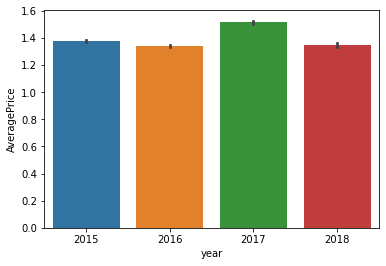

In [94]:
sns.barplot(x="year",y="AveragePrice",data=df)

<AxesSubplot:xlabel='month', ylabel='AveragePrice'>

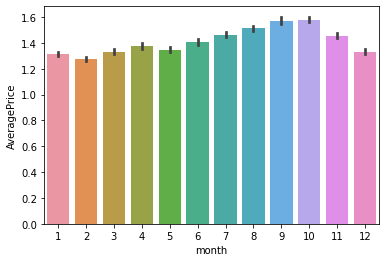

In [95]:
sns.barplot(x="month",y="AveragePrice",data=df)

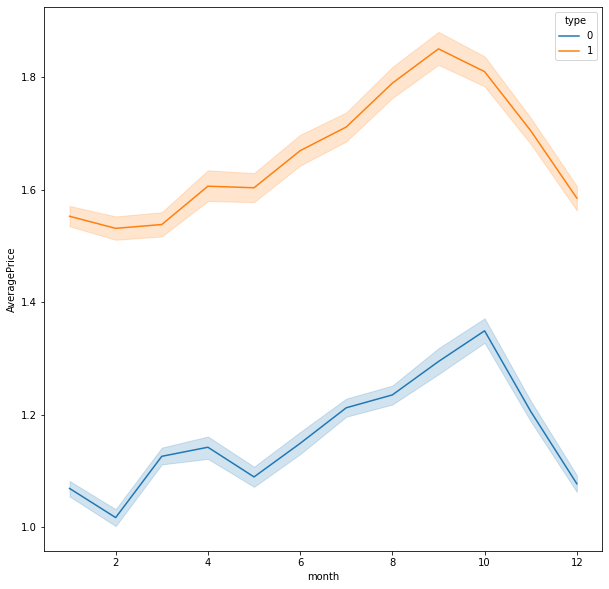

In [96]:
plt.figure(figsize=(10,10))
sns.lineplot(x="month",y="AveragePrice",hue="type",data=df)
plt.show()

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'type'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'region'}>],
       [<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'date'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

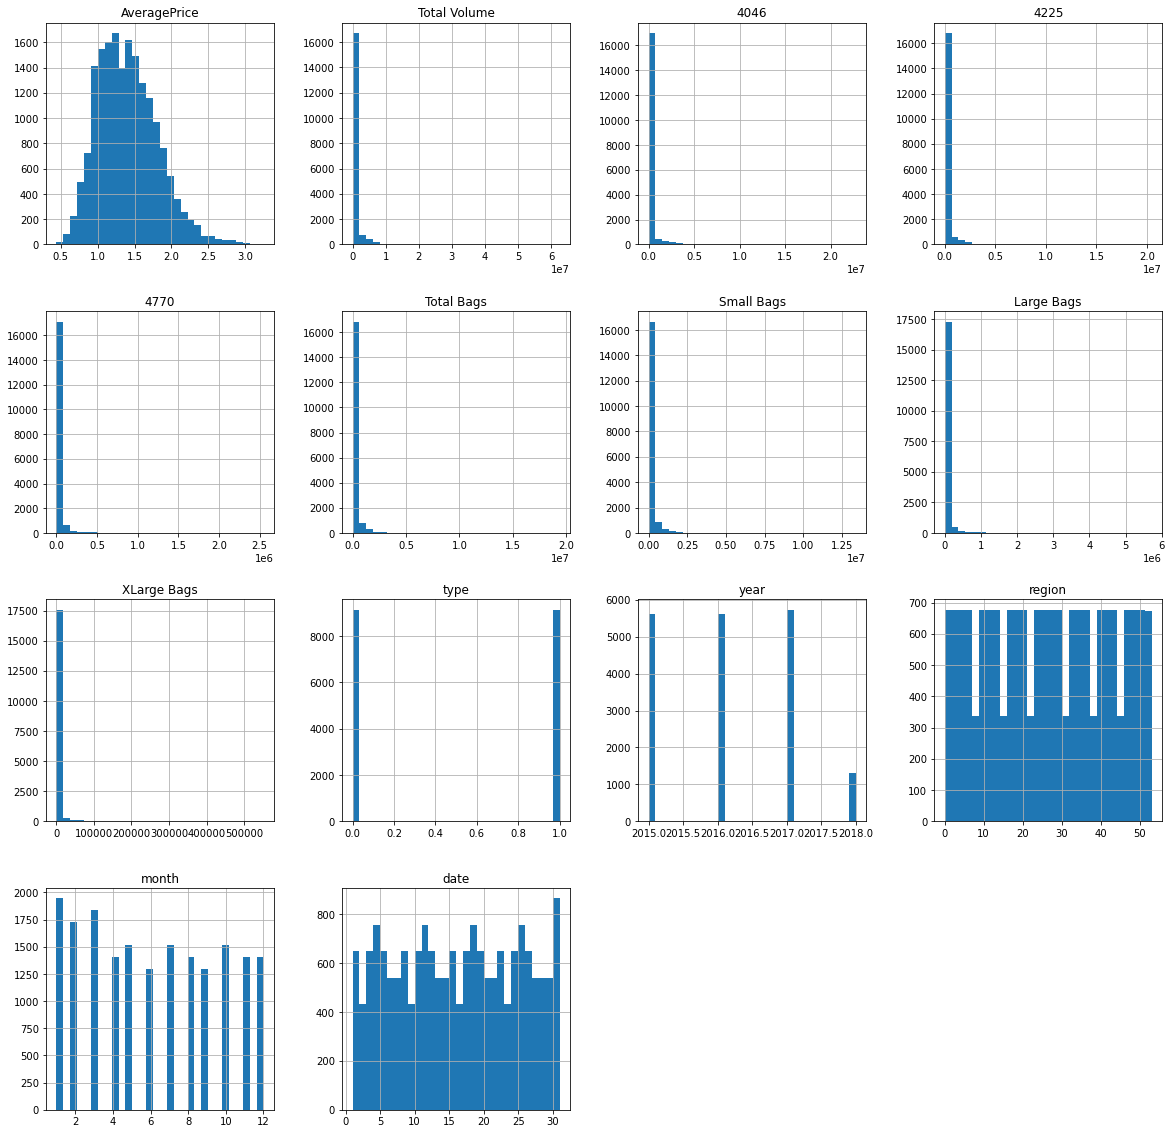

In [100]:
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

In [11]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,date
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000,12.000000,31.000000


In [12]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
month            0.106617
date             0.014310
dtype: float64

AveragePrice       AxesSubplot(0.125,0.749828;0.133621x0.130172)
Total Volume    AxesSubplot(0.285345,0.749828;0.133621x0.130172)
4046             AxesSubplot(0.44569,0.749828;0.133621x0.130172)
4225            AxesSubplot(0.606034,0.749828;0.133621x0.130172)
4770            AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Total Bags         AxesSubplot(0.125,0.593621;0.133621x0.130172)
Small Bags      AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Large Bags       AxesSubplot(0.44569,0.593621;0.133621x0.130172)
XLarge Bags     AxesSubplot(0.606034,0.593621;0.133621x0.130172)
type            AxesSubplot(0.766379,0.593621;0.133621x0.130172)
year               AxesSubplot(0.125,0.437414;0.133621x0.130172)
region          AxesSubplot(0.285345,0.437414;0.133621x0.130172)
month            AxesSubplot(0.44569,0.437414;0.133621x0.130172)
date            AxesSubplot(0.606034,0.437414;0.133621x0.130172)
dtype: object

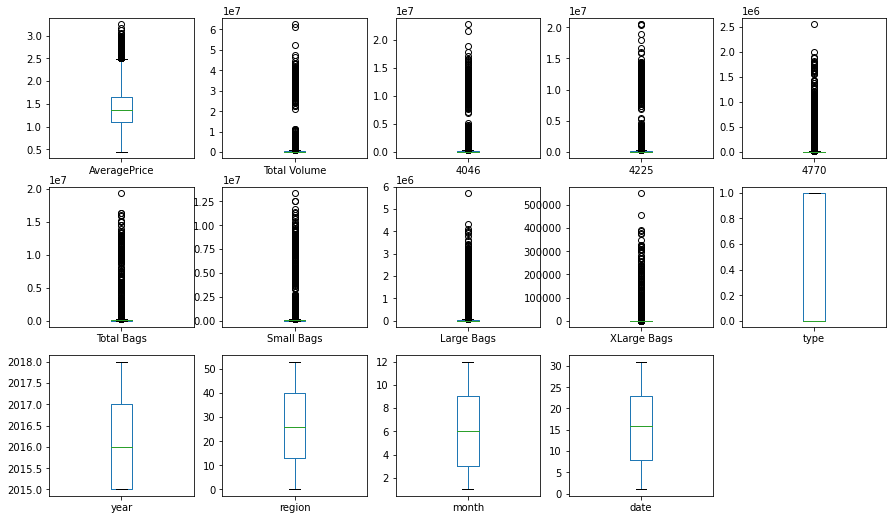

In [13]:
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

Z SCORE METHOD

In [14]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.18868864, 0.22771641, 0.23081597, ..., 1.7002522 , 1.64763162,
        1.29185687],
       [0.13901962, 0.23042664, 0.23110251, ..., 1.7002522 , 1.64763162,
        0.49423066],
       [1.18206895, 0.21208462, 0.23100731, ..., 1.7002522 , 1.64763162,
        0.30339555],
       ...,
       [1.15237477, 0.24233073, 0.2306933 , ..., 1.70081131, 1.46495942,
        0.60817726],
       [1.30138182, 0.24162464, 0.2304279 , ..., 1.70081131, 1.46495942,
        0.18944895],
       [0.53151208, 0.24125273, 0.22934712, ..., 1.70081131, 1.46495942,
        0.98707516]])

In [15]:
df_new=df[(z<3).all(axis=1)]
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,date
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


In [16]:
df.shape

(18249, 14)

In [17]:
17651/18249

0.9672310811551318

In [18]:
df_new.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
month           0.107408
date            0.011778
dtype: float64

In [19]:
list=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'month', 'date']
for i in list:
    vc=df_new[i].value_counts()
    print(vc)

1.15    193
1.18    191
1.26    189
1.59    186
1.48    185
       ... 
0.49      2
2.53      2
0.44      1
0.48      1
0.46      1
Name: AveragePrice, Length: 215, dtype: int64
13234.04      2
7223.46       2
569349.05     2
2038.99       2
3529.44       2
             ..
35852.68      1
10787.78      1
5303260.40    1
2273.57       1
10187.56      1
Name: Total Volume, Length: 17641, dtype: int64
0.00         242
3.00          10
1.24           8
4.00           8
1.00           8
            ... 
429.90         1
1121.56        1
880344.33      1
15880.80       1
2688.00        1
Name: 4046, Length: 17105, dtype: int64
0.00         61
215.36        3
94.74         3
1.26          3
1.30          3
             ..
5234.25       1
311687.85     1
10472.82      1
87311.02      1
512.00        1
Name: 4225, Length: 17506, dtype: int64
0.00        5425
2.66           7
3.32           7
1.59           6
1.60           6
            ... 
865.30         1
49808.51       1
5397.32        1
74

In [20]:
skew=( 'Total Volume', '4046', '4225', '4770', 'Small Bags','Large Bags', 'XLarge Bags','Total Bags')
for col in skew:
    if df_new.skew().loc[col]>0.55:
        df_new[col]=np.log1p(df[col])

In [21]:
df_new.skew()

AveragePrice    0.377432
Total Volume   -0.049950
4046           -0.420273
4225           -0.604619
4770            0.068532
Total Bags     -0.384493
Small Bags     -0.788988
Large Bags     -0.610874
XLarge Bags     1.216238
type           -0.037741
year            0.229976
region          0.012798
month           0.107408
date            0.011778
dtype: float64

CORRELATION GRAPH

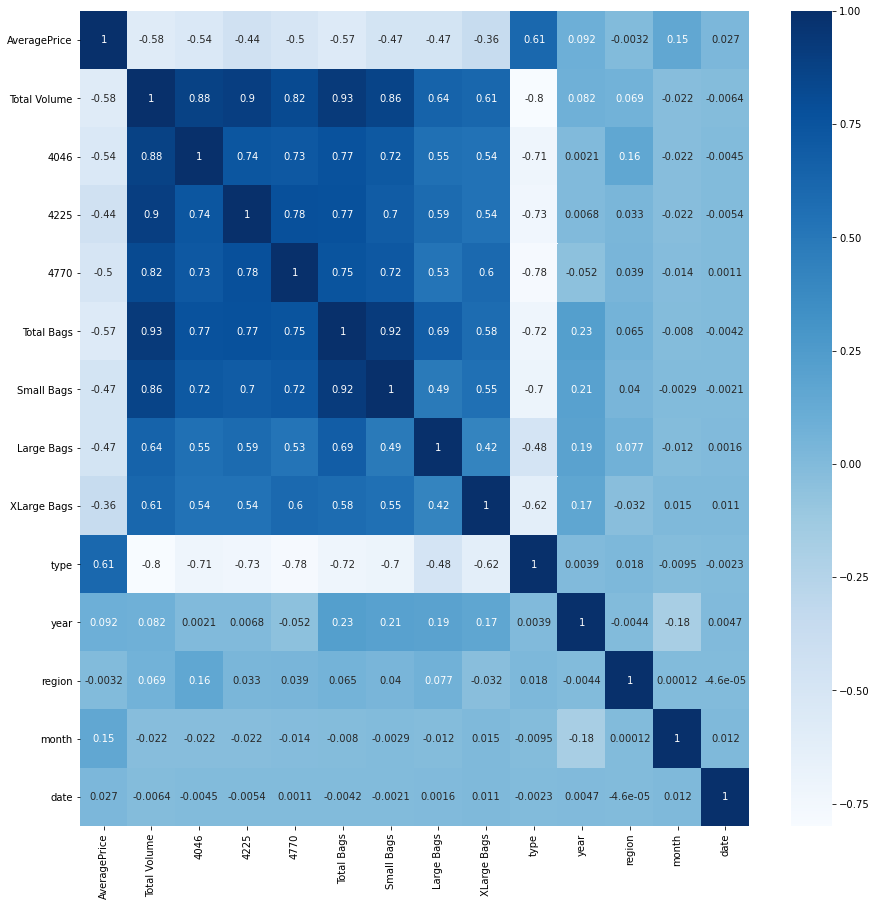

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(df_new.corr(),annot=True,cmap="Blues")
plt.show()

CHECKING FOR VIF FACTOR

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df_new.iloc[:,1:]
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,date
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,0,12,27
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,0,12,20
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,0,12,13
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,0,12,6
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,2018,53,2,4
18245,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,2018,53,1,28
18246,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,2018,53,1,21
18247,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,2018,53,1,14


In [24]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["variable"]=x.columns
    vif["VIF factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [25]:
calc_vif(x)

,variable,VIF factor
0,Total Volume,1062.974952
1,4046,48.186839
2,4225,106.100354
3,4770,9.219693
4,Total Bags,490.173449
5,Small Bags,149.397429
6,Large Bags,11.711121
7,XLarge Bags,2.510226
8,type,7.059463
9,year,154.076440


In [26]:
df_new.drop(["Total Bags"],axis=1,inplace=True)

In [27]:
x=df_new.iloc[:,1:]
x

,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,month,date
0,11.070344,6.944801,10.905146,3.895080,9.060055,4.545951,0.0,0,2015,0,12,27
1,10.912867,6.515127,10.706381,4.083115,9.149429,4.589955,0.0,0,2015,0,12,20
2,11.680313,6.679222,11.600485,4.879007,8.992584,4.645736,0.0,0,2015,0,12,13
3,11.277116,7.032624,11.184108,4.298373,8.644425,4.903495,0.0,0,2015,0,12,6
4,10.840377,6.848515,10.688288,4.340944,8.697389,5.291746,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,9.745419,7.624599,7.333154,0.000000,9.477908,6.070391,0.0,1,2018,53,2,4
18245,9.538855,7.083975,8.141044,0.000000,9.098407,5.786284,0.0,1,2018,53,1,28
18246,9.530085,7.084159,7.805389,6.591591,9.143431,3.768384,0.0,1,2018,53,1,21
18247,9.693150,7.332127,8.000363,6.590315,9.298401,3.931826,0.0,1,2018,53,1,14


In [28]:
calc_vif(x)

,variable,VIF factor
0,Total Volume,717.044739
1,4046,43.531308
2,4225,95.572839
3,4770,9.216754
4,Small Bags,84.207634
5,Large Bags,8.072478
6,XLarge Bags,2.508532
7,type,6.994429
8,year,152.548249
9,region,4.170072


STANDARD SCALER METHOD

In [29]:
from sklearn.preprocessing import StandardScaler          
scale=StandardScaler()                                    
x=scale.fit_transform(x)
x.shape

(17651, 12)

In [30]:
y=df_new.iloc[:,-1]
y.shape

(17651,)

MACHINE LEARNING PROCESS

CHOOSING THE BEST RANDOM STATE

In [31]:
max_acc=0
max_rs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i) 
    m=LinearRegression()
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    acc=r2_score(predm,y_test)   
       
    if acc>max_acc:
        max_acc=acc
        max_rs=i
print("best accuracy=",max_acc,"on random state",max_rs)

best accuracy= 1.0 on random state 1


In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=1)

In [33]:
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),RandomForestRegressor(),KNeighborsRegressor()]
for i in model:
    i.fit(x_train,y_train)
    pred_test=i.predict(x_test)
    print("testing score=",r2_score(pred_test,y_test))         
    print("training score=",i.score(x_train,y_train))
    mse=mean_squared_error(pred_test,y_test)
    rmse=math.sqrt(mse)
    print("error=",rmse,"\n")

testing score= 1.0
training score= 1.0
error= 8.389637947842906e-15 

testing score= 1.0
training score= 1.0
error= 0.0 

testing score= 0.9987411854750096
training score= 0.9988470064370322
error= 0.30923277545608524 

testing score= 1.0
training score= 1.0
error= 0.0 

testing score= 0.9303023755522559
training score= 0.9630979355516919
error= 2.0227333366159272 



CROSS VALIDATION PROCESS

In [34]:
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),RandomForestRegressor(),KNeighborsRegressor()]
for i in model:
    score=cross_val_score(i,x,y,cv=5) 
    print("score=",score)
    print("mean_score=",score.mean())
    print("std=",score.std(),"\n")

score= [1. 1. 1. 1. 1.]
mean_score= 1.0
std= 0.0 

score= [1. 1. 1. 1. 1.]
mean_score= 1.0
std= 0.0 

score= [0.98987859 0.99798306 0.99514114 0.9956906  0.97784041]
mean_score= 0.9913067581516319
std= 0.00723706865835159 

score= [1. 1. 1. 1. 1.]
mean_score= 1.0
std= 0.0 

score= [0.96594562 0.96998274 0.97120105 0.9710235  0.96843992]
mean_score= 0.9693185658371725
std= 0.0019514330582433962 



HYPERPARAMETER TUNING PROCESS FOR THE BEST MODEL

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
parameters={"criterion":["squared_error", "mse","friedman_mse","absolute_error", "mae", "poisson"],"splitter":["best","random"],"max_depth": np.arange(2,10), "max_features": ["auto","sqrt","log2"]}

In [37]:
gcv=GridSearchCV(DecisionTreeRegressor(),parameters,cv=5)

In [38]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'mse', 'friedman_mse',
                                       'absolute_error', 'mae', 'poisson'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [39]:
gcv.best_params_

{'criterion': 'mse',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}

In [40]:
final_model=DecisionTreeRegressor(criterion="mse",max_depth=5,max_features="auto",splitter="best")
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print(r2_score(pred,y_test))
print("score=",final_model.score(x_train,y_train))
mse=mean_squared_error(pred,y_test)
rmse=math.sqrt(mse)
print(rmse)

1.0
score= 1.0
0.0


SAVING THE BEST MODEL

In [41]:
import joblib

joblib.dump(final_model,"avocado_avg_pricefile.obj")

['avocado_avg_pricefile.obj']

In [42]:
avocado_avg_pricefile_from_joblib=joblib.load("avocado_avg_pricefile.obj")
avocado_avg_pricefile_from_joblib.predict(x_test)

array([10., 25.,  1., ..., 24., 15., 21.])

CLASSIFICATION MODEL - TO PREDICT THE REGION

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore") 

In [44]:
df_new

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,month,date
0,1.33,11.070344,6.944801,10.905146,3.895080,9.060055,4.545951,0.0,0,2015,0,12,27
1,1.35,10.912867,6.515127,10.706381,4.083115,9.149429,4.589955,0.0,0,2015,0,12,20
2,0.93,11.680313,6.679222,11.600485,4.879007,8.992584,4.645736,0.0,0,2015,0,12,13
3,1.08,11.277116,7.032624,11.184108,4.298373,8.644425,4.903495,0.0,0,2015,0,12,6
4,1.28,10.840377,6.848515,10.688288,4.340944,8.697389,5.291746,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,9.745419,7.624599,7.333154,0.000000,9.477908,6.070391,0.0,1,2018,53,2,4
18245,1.71,9.538855,7.083975,8.141044,0.000000,9.098407,5.786284,0.0,1,2018,53,1,28
18246,1.87,9.530085,7.084159,7.805389,6.591591,9.143431,3.768384,0.0,1,2018,53,1,21
18247,1.93,9.693150,7.332127,8.000363,6.590315,9.298401,3.931826,0.0,1,2018,53,1,14


In [45]:
df_new.skew()

AveragePrice    0.377432
Total Volume   -0.049950
4046           -0.420273
4225           -0.604619
4770            0.068532
Small Bags     -0.788988
Large Bags     -0.610874
XLarge Bags     1.216238
type           -0.037741
year            0.229976
region          0.012798
month           0.107408
date            0.011778
dtype: float64

In [48]:
df_new.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'region', 'month', 'date'],
      dtype='object')

CORRELATION GRAPH

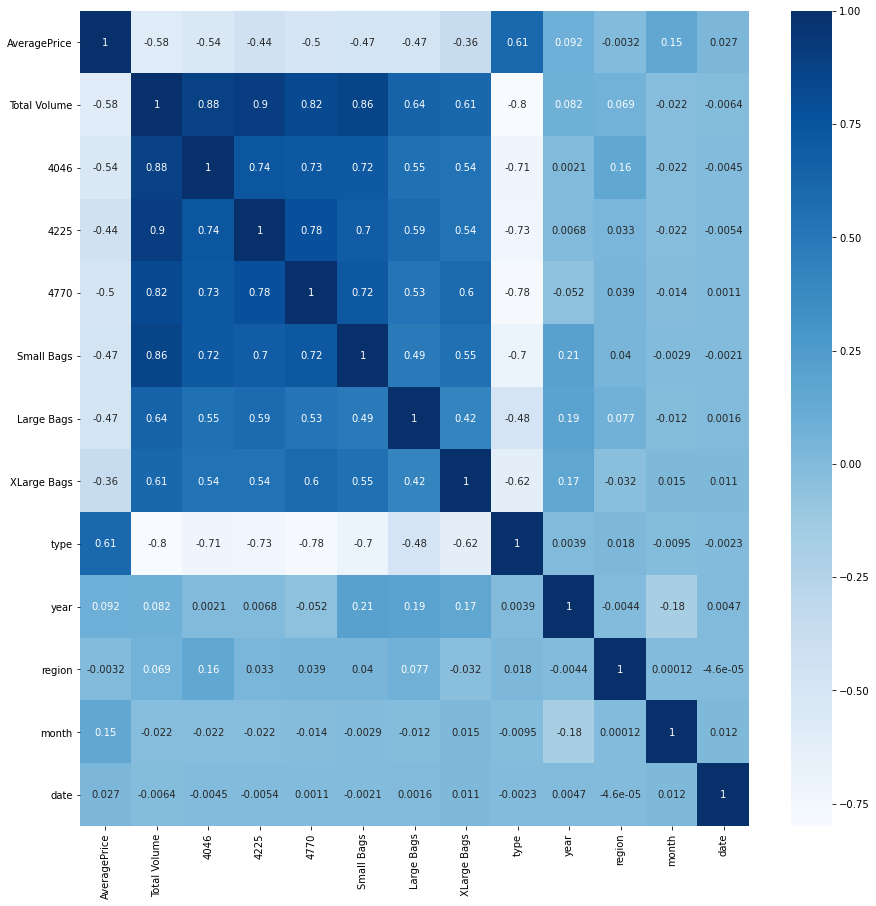

In [49]:
plt.figure(figsize=(15,15))
sns.heatmap(df_new.corr(),annot=True,cmap="Blues")
plt.show()

In [50]:
df_new.drop("date",axis=1,inplace=True)

CHECKING FOR VIF FACTOR

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df_new.iloc[:,df_new.columns != 'region']
x

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,month
0,1.33,11.070344,6.944801,10.905146,3.895080,9.060055,4.545951,0.0,0,2015,12
1,1.35,10.912867,6.515127,10.706381,4.083115,9.149429,4.589955,0.0,0,2015,12
2,0.93,11.680313,6.679222,11.600485,4.879007,8.992584,4.645736,0.0,0,2015,12
3,1.08,11.277116,7.032624,11.184108,4.298373,8.644425,4.903495,0.0,0,2015,12
4,1.28,10.840377,6.848515,10.688288,4.340944,8.697389,5.291746,0.0,0,2015,11
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,9.745419,7.624599,7.333154,0.000000,9.477908,6.070391,0.0,1,2018,2
18245,1.71,9.538855,7.083975,8.141044,0.000000,9.098407,5.786284,0.0,1,2018,1
18246,1.87,9.530085,7.084159,7.805389,6.591591,9.143431,3.768384,0.0,1,2018,1
18247,1.93,9.693150,7.332127,8.000363,6.590315,9.298401,3.931826,0.0,1,2018,1


In [52]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["variable"]=x.columns
    vif["VIF factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [53]:
calc_vif(x)

,variable,VIF factor
0,AveragePrice,29.058730
1,Total Volume,771.546722
2,4046,41.943325
3,4225,106.412272
4,4770,9.212248
5,Small Bags,86.635806
6,Large Bags,8.326322
7,XLarge Bags,2.522283
8,type,7.975311
9,year,193.606876


In [54]:
df_new.drop("Total Volume",axis=1,inplace=True)

In [55]:
x=df_new.iloc[:,df_new.columns != 'region']
x

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,month
0,1.33,6.944801,10.905146,3.895080,9.060055,4.545951,0.0,0,2015,12
1,1.35,6.515127,10.706381,4.083115,9.149429,4.589955,0.0,0,2015,12
2,0.93,6.679222,11.600485,4.879007,8.992584,4.645736,0.0,0,2015,12
3,1.08,7.032624,11.184108,4.298373,8.644425,4.903495,0.0,0,2015,12
4,1.28,6.848515,10.688288,4.340944,8.697389,5.291746,0.0,0,2015,11
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,7.624599,7.333154,0.000000,9.477908,6.070391,0.0,1,2018,2
18245,1.71,7.083975,8.141044,0.000000,9.098407,5.786284,0.0,1,2018,1
18246,1.87,7.084159,7.805389,6.591591,9.143431,3.768384,0.0,1,2018,1
18247,1.93,7.332127,8.000363,6.590315,9.298401,3.931826,0.0,1,2018,1


In [56]:
calc_vif(x)

,variable,VIF factor
0,AveragePrice,26.980291
1,4046,25.920529
2,4225,47.088878
3,4770,9.212229
4,Small Bags,43.540846
5,Large Bags,7.791890
6,XLarge Bags,2.501470
7,type,7.959694
8,year,84.289677
9,month,4.234315


In [57]:
df_new["region"].value_counts()

38    338
10    338
16    338
32    338
49    338
2     338
18    338
34    338
19    338
35    338
4     338
5     338
23    338
39    338
8     338
9     338
0     338
26    338
11    338
44    338
30    338
12    338
27    338
13    338
28    337
1     337
20    337
41    336
14    336
50    336
33    336
40    336
24    335
31    335
25    333
21    333
48    333
53    332
7     332
22    331
17    331
36    330
3     329
37    328
47    328
43    326
29    325
46    307
42    301
45    292
6     290
15    272
52    256
51    169
Name: region, dtype: int64

STANDARD SCALER METHOD

In [58]:
from sklearn.preprocessing import StandardScaler          
scale=StandardScaler()                                    
x=scale.fit_transform(x)
x.shape

(17651, 10)

In [59]:
y=df_new.iloc[:,9]
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 17651, dtype: int32

MACHINE LEARNING PROCESS

CHOOSING THE BEST RANDOM STATE

In [60]:
max_acc=0
max_rs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i) 
    m=DecisionTreeClassifier()
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    acc=accuracy_score(predm,y_test)   
       
    if acc>max_acc:
        max_acc=acc
        max_rs=i
print("best accuracy=",max_acc,"on random state",max_rs)

best accuracy= 0.8091012084592145 on random state 100


In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=100)

In [62]:
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),RandomForestClassifier(),KNeighborsClassifier()]
for i in model:
    i.fit(x_train,y_train)
    pred_test=i.predict(x_test)
    print("testing score=",accuracy_score(pred_test,y_test))         
    print("training score=",i.score(x_train,y_train))
    print(confusion_matrix(pred_test,y_test))
    print(classification_report(pred_test,y_test),"\n")

testing score= 0.4907477341389728
training score= 0.4987454471873735
[[71  0  0 ...  0  0  0]
 [ 0 40  0 ...  0  0  1]
 [ 0  0 55 ...  0  0  0]
 ...
 [ 0  0  0 ... 48  0  0]
 [ 0  0  0 ...  1 56  0]
 [ 0  0  5 ...  0  0 17]]
              precision    recall  f1-score   support

           0       0.63      0.64      0.64       111
           1       0.38      0.22      0.28       180
           2       0.52      0.68      0.59        81
           3       0.53      0.64      0.58        85
           4       0.50      0.48      0.49       103
           5       0.45      0.50      0.47        84
           6       0.93      0.87      0.90       103
           7       0.63      0.50      0.56       124
           8       0.72      0.67      0.69       120
           9       0.80      0.47      0.59       185
          10       0.29      0.51      0.37        55
          11       0.63      0.55      0.58       108
          12       0.43      0.42      0.42       117
          13      

CROSS VALIDATION PROCESS

In [63]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),RandomForestClassifier(),KNeighborsClassifier()]
for i in model:
    score=cross_val_score(i,x,y,cv=10) 
    print("score=",score)
    print("mean_score=",score.mean())
    print("std=",score.std(),"\n")

score= [0.43884485 0.39490085 0.37167139 0.30028329 0.35977337 0.4713881
 0.4815864  0.48101983 0.33937677 0.46232295]
mean_score= 0.41011677932877555
std= 0.06225085281241027 

score= [0.7015855  0.68668555 0.69121813 0.64022663 0.71501416 0.60283286
 0.56033994 0.58753541 0.53654391 0.61813031]
mean_score= 0.6340112416145064
std= 0.059603050116962084 

score= [0.74405436 0.75127479 0.66912181 0.65325779 0.6509915  0.63229462
 0.63456091 0.63229462 0.5286119  0.59773371]
mean_score= 0.6494196003195392
std= 0.06148889300162178 

score= [0.84881087 0.81076487 0.84022663 0.83626062 0.82832861 0.77110482
 0.69688385 0.72691218 0.63172805 0.73654391]
mean_score= 0.7727564413103668
std= 0.06925577264287407 

score= [0.5186863  0.53314448 0.46515581 0.39716714 0.40396601 0.50028329
 0.51274788 0.4878187  0.36543909 0.45892351]
mean_score= 0.4643332189067017
std= 0.05462844725233315 



HYPERPARAMETER TUNING PROCESS FOR OUR BEST MODEL

In [64]:
from sklearn.model_selection import GridSearchCV

In [68]:
parameter={"bootstrap": [True,False],
          "criterion": ["gini","entropy"],
          "warm_start": [True,False],
          "max_features": ["auto","sqrt","log2"]}

In [69]:
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [70]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'warm_start': [True, False]})

In [71]:
gcv.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_features': 'sqrt',
 'warm_start': False}

In [72]:
final_model=RandomForestClassifier(bootstrap=False,criterion="entropy",max_features='sqrt',warm_start=False)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print(accuracy_score(pred,y_test))

0.9263595166163142


AUC-ROC CURVE

In [73]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [83]:
y_pred_prob=final_model.predict_proba(x_test)
y_pred_prob

array([[0.04, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.  , 0.  , 0.  ]])

In [84]:
roc_auc_score(y_test,y_pred_prob, multi_class='ovo', average='weighted')

0.9981595522254685

Text(0.5, 1.0, 'RandomForestClassifier')

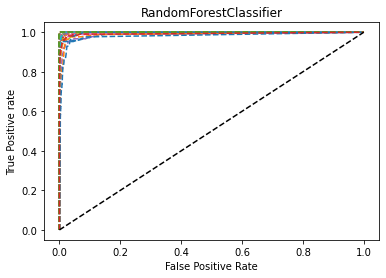

In [88]:
fpr = {}
tpr = {}
thresh ={}

n_class =54

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:,i], pos_label=i)
    plt.plot(fpr[i], tpr[i], linestyle='--')

plt.plot([0,1],[0,1],"k--")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title("RandomForestClassifier")

SAVING THE BEST MODEL

In [89]:
import joblib

joblib.dump(final_model,"avocado_regionfile.obj")

['avocado_regionfile.obj']

In [90]:
avocado_regionfile_from_joblib=joblib.load("avocado_regionfile.obj")
avocado_regionfile_from_joblib.predict(x_test)

array([16, 26, 18, ..., 18, 19, 43])